# SISTER Algorithm registration

In [ ]:
from maap.maap import MAAP
import IPython

maap = MAAP(maap_host="sister-api.imgspec.org")

## sister-preprocess

https://github.com/EnSpec/sister-preprocess

In [ ]:
preprocess_alg = {
    "script_command": "sister-preprocess/.imgspec/imgspec_run.sh",
    "repo_url": "https://github.com/EnSpec/sister-preprocess.git",
    "algorithm_name":"sister-preprocess",
    "code_version":"1.0.0",
    "algorithm_description":"Preprocess L1 image data for input into downstream algorithms",
    "environment_name":"ubuntu",
    "disk_space":"50GB",
    "queue": "sister-job_worker-32gb",
    "build_command": "sister-preprocess/.imgspec/install.sh",
    "docker_container_url":"mas.dit.maap-project.org/root/maap-workspaces/base_images/vanilla:dit",
    "algorithm_params":[
        {
            "field": "l1_granule",
            "type": "file"
        },
          {
            "field": "landsat",
            "type": "positional",
            "default": "None"
        }
    ]
}

response = maap.registerAlgorithm(arg=preprocess_alg)
print(response.content.decode("UTF-8"))

## sister-isofit

In [ ]:
isofit_alg = {
    "script_command": "sister-isofit/.imgspec/imgspec_run.sh",
    "repo_url": "https://gitlab.com/geospec/sister-isofit.git",
    "algorithm_name": "sister-isofit",
    "code_version": "1.0.0",
    "algorithm_description": "The SISTER wrapper for ISOFIT. ISOFIT (Imaging Spectrometer Optimal FITting) contains a set of routines and utilities for fitting surface, atmosphere and instrument models to imaging spectrometer data.",
    "environment_name":"ubuntu",
    "disk_space": "70GB",
    "queue": "sister-job_worker-32gb",
    "build_command": "sister-isofit/.imgspec/install.sh",
    "docker_container_url": "localhost:5050/base_images/isofit:1.0",
    "algorithm_params": [
        {
            "field": "l1_granule",
            "type": "file"
        },
        {
            "field": "surface_reflectance_spectra",
            "type": "positional"
        },
        {
            "field": "vegetation_reflectance_spectra",
            "type": "positional"
        },
        {
            "field": "water_reflectance_spectra",
            "type": "positional"
        },
        {
            "field": "snow_and_liquids_reflectance_spectra",
            "type": "positional"
        },
        {
            "field": "segmentation_size",
            "type": "positional",
            "default": "50"
        },
        {
            "field": "n_cores",
            "type": "positional",
            "default": "32"
        }
    ]
}

response = maap.registerAlgorithm(arg=isofit_alg)
print(response.content.decode("UTF-8"))

## sister-resample

https://github.com/EnSpec/sister-resample

In [ ]:
resample_alg = {
    "script_command": "sister-resample/.imgspec/imgspec_run.sh",
    "repo_url": "https://github.com/EnSpec/sister-resample.git",
    "algorithm_name":"sister-resample",
    "code_version":"1.1.0",
    "algorithm_description":"Spectrally resample reflectance and uncertainty images",
    "environment_name":"ubuntu",
    "disk_space":"50GB",
    "queue": "sister-job_worker-32gb",
    "build_command": "sister-resample/.imgspec/install.sh",
    "docker_container_url":"mas.dit.maap-project.org/root/maap-workspaces/base_images/vanilla:dit",
    "algorithm_params":[
        {
            "field": "l2a_granule",
            "type": "file"
        }
    ]
}

response = maap.registerAlgorithm(resample_alg)
print(response.text)

## sister-reflect_correct

https://github.com/EnSpec/sister-reflect_correct

In [ ]:

rfl_correct_alg = {
    "script_command": "sister-reflect_correct/.imgspec/imgspec_run.sh",
    "repo_url": "https://github.com/EnSpec/sister-reflect_correct.git",
    "algorithm_name":"sister-reflect_correct",
    "code_version":"1.0.0",
    "algorithm_description":"Topo, BRDF and glint correction",
    "environment_name":"ubuntu",
    "disk_space":"70GB",
    "queue": "sister-job_worker-32gb",
    "build_command": "sister-reflect_correct/.imgspec/install.sh",
    "docker_container_url":"mas.dit.maap-project.org/root/maap-workspaces/base_images/vanilla:dit",
    "algorithm_params":[
        {
            "field": "l1b_granule",
            "type": "file"
        },
        {
            "field": "l2a_granule",
            "type": "file"
        }
    ]
}
response = maap.registerAlgorithm(arg=rfl_correct_alg)

## sister-cwl workflow


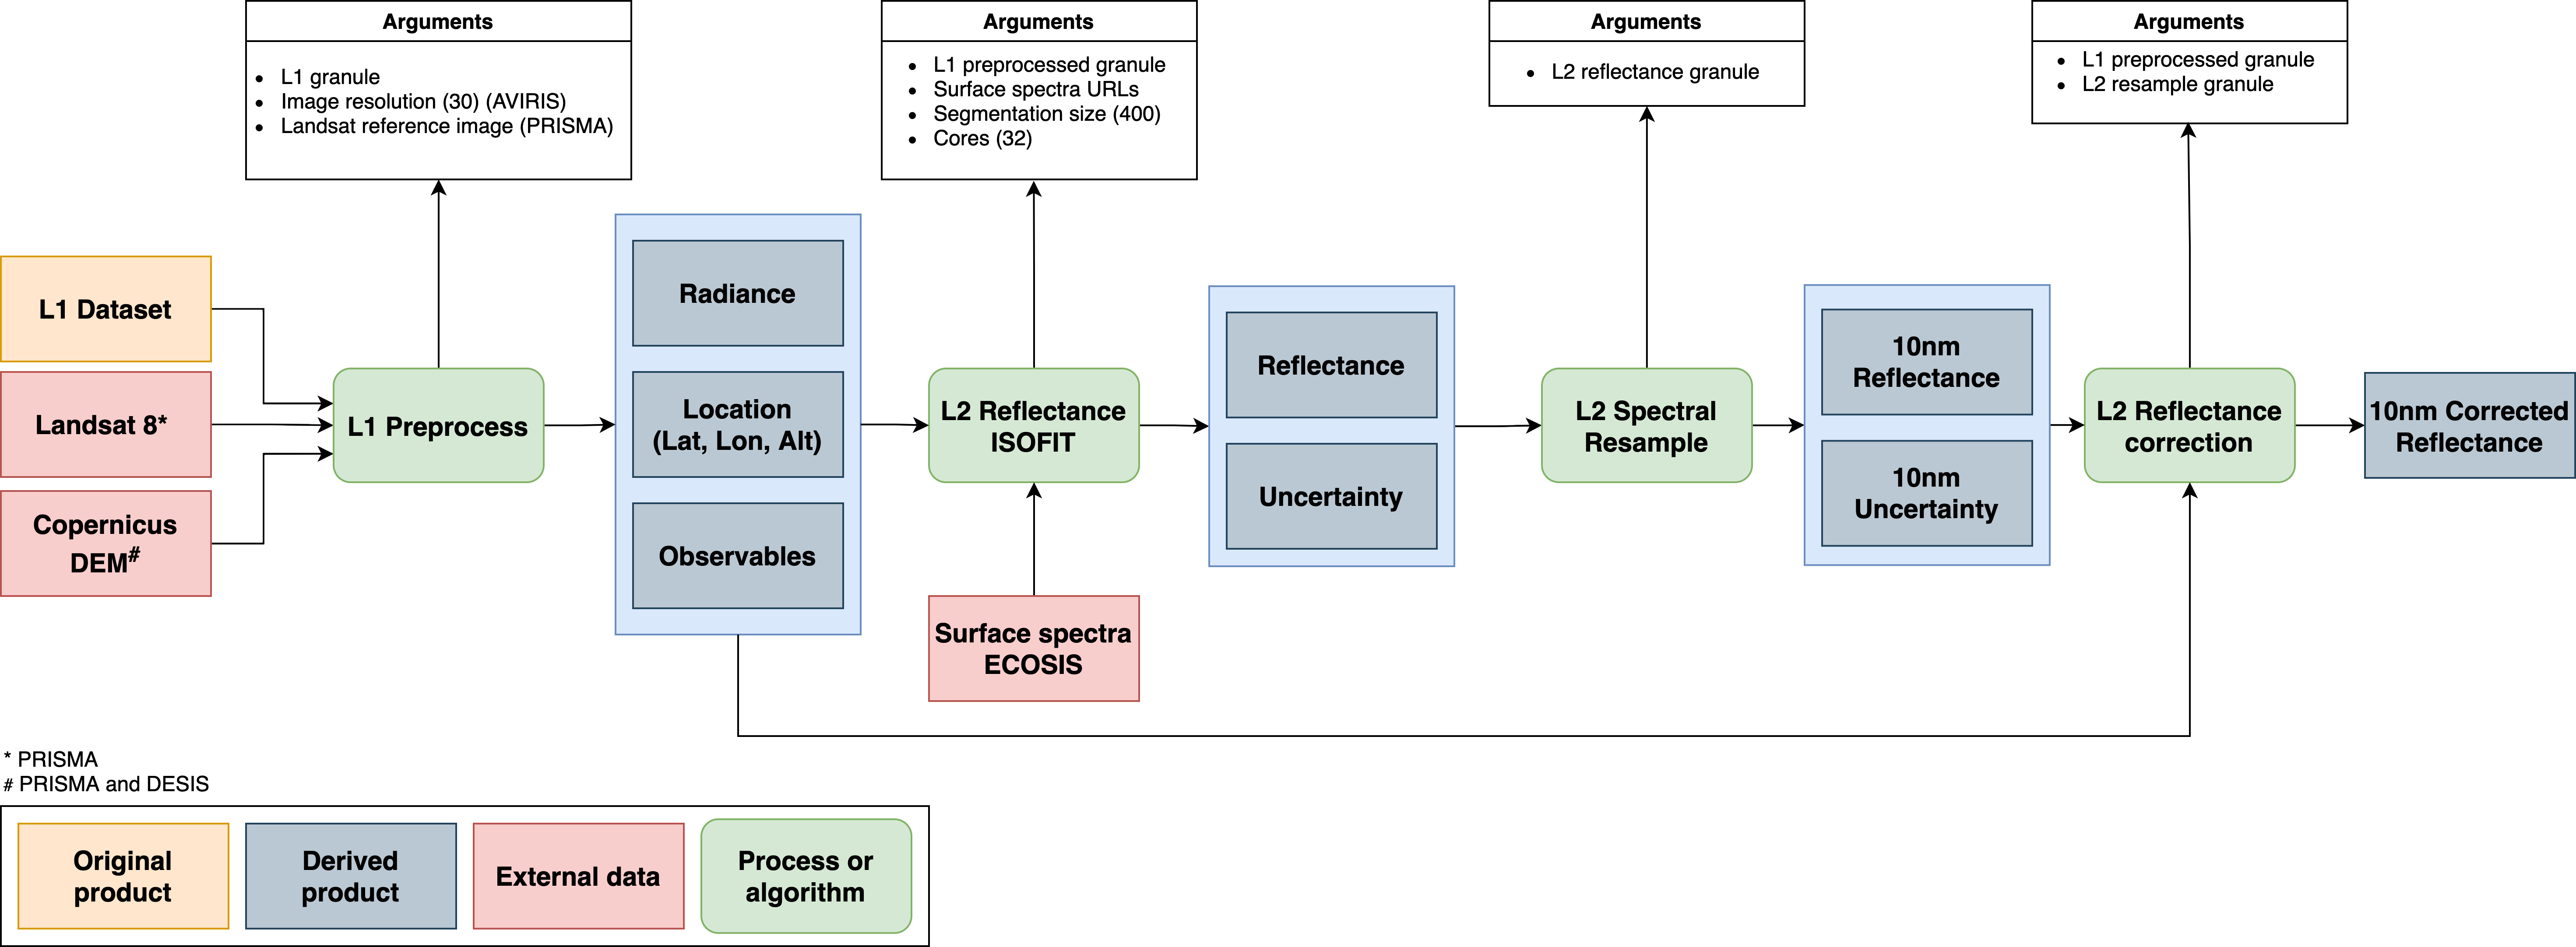

In [13]:
IPython.display.Image('../figures/sister_cwl_workflow.png')

In [ ]:
cwl_workflow_alg = {
    "script_command": "cwl-pipeline-executor/run-cwl.sh",
    "repo_url": "https://gitlab.com/geospec/cwl-pipeline-executor.git",
    "algorithm_name":"run_sister_workflow",
    "code_version":"dev",
    "algorithm_description":"Run CWL Workflow",
    "environment_name":"ubuntu",
    "disk_space":"10GB",
    "queue": "sister-job_worker-8gb",
    "build_command": "cwl-pipeline-executor/build-env.sh",
    "docker_container_url":"mas.dit.maap-project.org/root/maap-workspaces/base_images/vanilla:dit",
    "algorithm_params":[
        {
            "field": "workflow_config",
            "type": "config"
        }
    ]
}
response = maap.registerAlgorithm(arg=cwl_workflow_alg)